**Project: Telecom Churn Analysis**

 Telecom churn analysis in the telecom sector referrs to predicting customer behavior regarding switching or discontinuing their services with a particular telecom provider.

 **Churn**- Refers to the rate at which customers or subscribers discontinue their relationship with a company or stop using its products or services.So our aim is to build the best model for prediction.

**Importing The Required Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/churn-bigml-20.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


**1  Pre Proccessing**

In [ ]:
#missing values
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
df['Churn']=df['Churn'].astype(int)

In [ ]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['State','International plan','Voice mail plan']
for i in lst:
  df[i]=le.fit_transform(df[i])



In [ ]:
df.dtypes

State                       int64
Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [ ]:
df['Churn'].value_counts()

0    572
1     95
Name: Churn, dtype: int64

**Visualization**

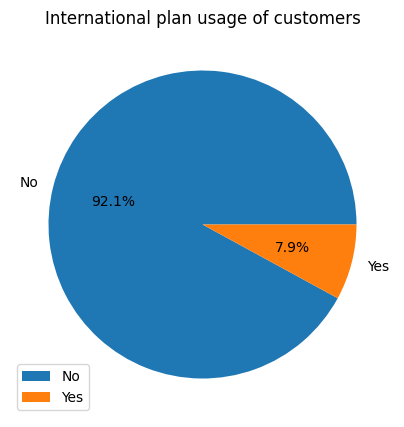

In [ ]:
#INTERNATIONAL PALN
y=df['International plan'].value_counts()
plt.figure(figsize=(5,5))
labels=['No','Yes']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('International plan usage of customers')
plt.show()

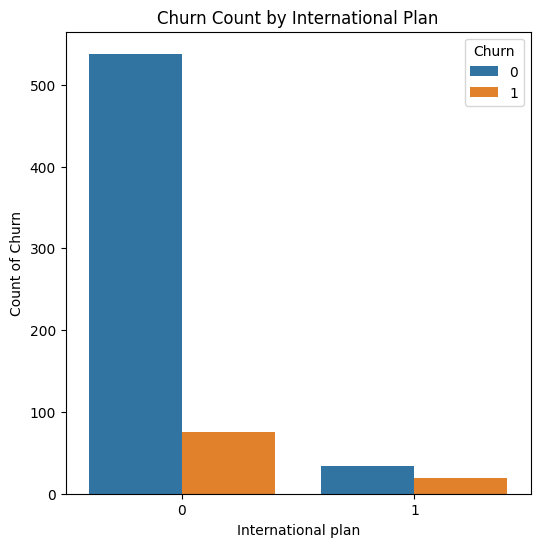

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
sns.countplot(x='International plan',data=df,hue='Churn')
plt.xlabel('International plan')
plt.ylabel('Count of Churn')
plt.title('Churn Count by International Plan')
plt.show()

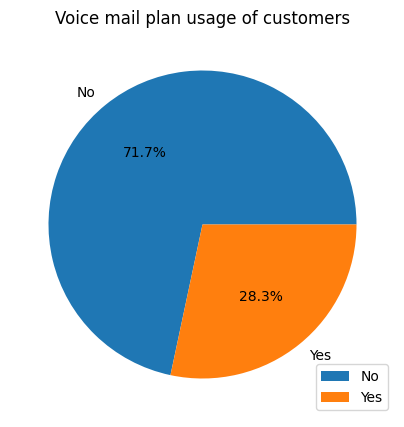

In [ ]:
#Voice mail plan
y=df['Voice mail plan'].value_counts()
plt.figure(figsize=(5,5))
labels=['No','Yes']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.title('Voice mail plan usage of customers')
plt.show()

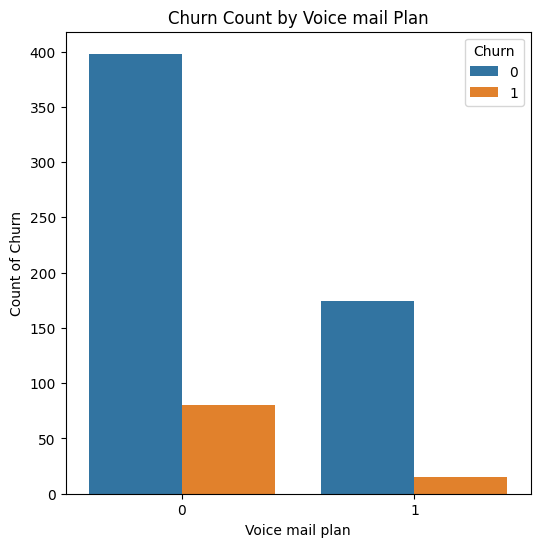

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
sns.countplot(x='Voice mail plan',data=df,hue='Churn')
plt.xlabel('Voice mail plan')
plt.ylabel('Count of Churn')
plt.title('Churn Count by Voice mail Plan')
plt.show()

<Axes: >

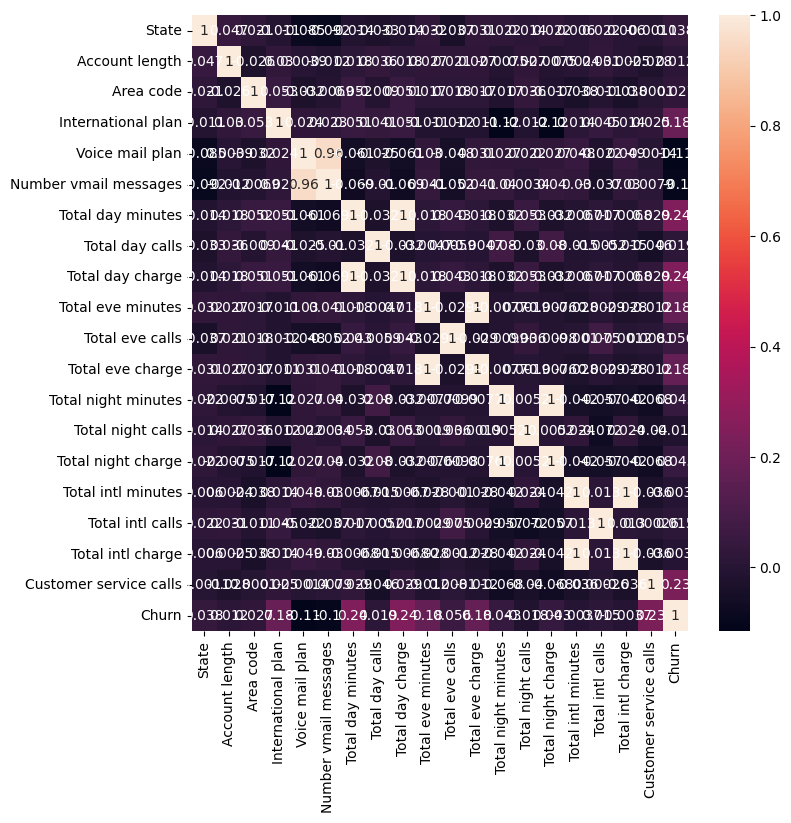

In [ ]:
#Heatmap
fig,ax=plt.subplots(1,1,figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
X=df.iloc[:,:-1]
X

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,48,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
663,1,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
664,46,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
665,49,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


In [ ]:
y=df.iloc[:,-1]
y

0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64

**CHI SQUARE TEST**

In [ ]:
#CHI SQUARE TEST
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
selector = SelectKBest(score_func=chi2, k=13)

In [ ]:
X_new = selector.fit_transform(X,y)

In [ ]:
selected_features_indices = selector.get_support(indices=True)

In [ ]:
selected_features_names = X.columns[selected_features_indices]

In [ ]:
print(selected_features_names)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Customer service calls'],
      dtype='object')


In [ ]:
X=df.drop(['Total day calls','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Churn'],axis=1)
X

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Customer service calls
0,18,117,408,0,0,0,184.5,31.37,351.6,80,29.89,215.8,1
1,15,65,415,0,0,0,129.1,21.95,228.5,83,19.42,208.8,4
2,34,161,415,0,0,0,332.9,56.59,317.8,97,27.01,160.6,4
3,40,111,415,0,0,0,110.4,18.77,137.3,102,11.67,189.6,2
4,11,49,510,0,0,0,119.3,20.28,215.1,109,18.28,178.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,48,114,415,0,1,26,137.1,23.31,155.7,125,13.23,247.6,2
663,1,106,408,0,1,29,83.6,14.21,203.9,131,17.33,229.5,1
664,46,60,415,0,0,0,193.9,32.96,85.0,110,7.23,210.1,3
665,49,159,415,0,0,0,169.8,28.87,197.7,105,16.80,193.7,1


In [ ]:
#oversampling
from imblearn.over_sampling import  SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)
y.value_counts()

0    572
1    572
Name: Churn, dtype: int64

In [ ]:
#minmaxscaler
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)
X_sc

array([[0.36      , 0.5021645 , 0.        , ..., 0.96774194, 0.55907112,
        0.125     ],
       [0.3       , 0.27705628, 0.06862745, ..., 0.57501875, 0.53875181,
        0.5       ],
       [0.68      , 0.69264069, 0.06862745, ..., 0.85971493, 0.3988389 ,
        0.5       ],
       ...,
       [0.62      , 0.46320346, 0.04901961, ..., 0.23232545, 0.66068589,
        0.5       ],
       [0.88      , 0.45454545, 1.        , ..., 0.64288375, 0.39732512,
        0.        ],
       [0.66      , 0.45887446, 0.02941176, ..., 0.62844043, 0.63682712,
        0.25      ]])

**Model Building**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,random_state=1,test_size=0.3)

In [ ]:
X_train.shape

(800, 13)

In [ ]:
y_train.shape

(800,)

**KNN**

In [ ]:
#KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [ ]:
print(accuracy_score(y_test,y_pred_knn)*100)

88.37209302325581


              precision    recall  f1-score   support

           0       0.92      0.84      0.88       169
           1       0.86      0.93      0.89       175

    accuracy                           0.88       344
   macro avg       0.89      0.88      0.88       344
weighted avg       0.89      0.88      0.88       344



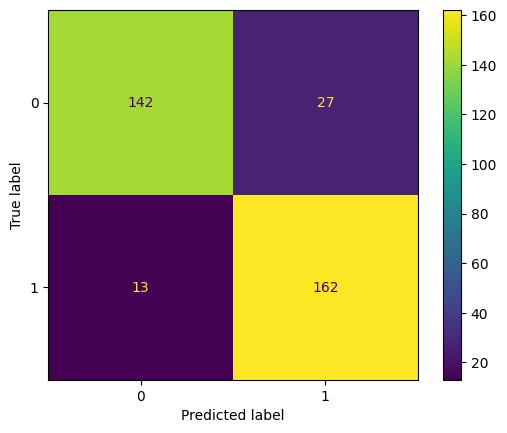

In [ ]:
print(classification_report(y_test,y_pred_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))

In [ ]:
#knn hypertuning
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knn,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
knn1=KNeighborsClassifier(n_neighbors=9,weights='distance',algorithm='auto')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       169
           1       0.85      0.94      0.89       175

    accuracy                           0.89       344
   macro avg       0.89      0.89      0.89       344
weighted avg       0.89      0.89      0.89       344



**NAIVE BAYES**

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
y_pred_nb

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,

In [ ]:
print(accuracy_score(y_test,y_pred_nb)*100)

73.54651162790698


              precision    recall  f1-score   support

           0       0.81      0.60      0.69       169
           1       0.69      0.87      0.77       175

    accuracy                           0.74       344
   macro avg       0.75      0.73      0.73       344
weighted avg       0.75      0.74      0.73       344



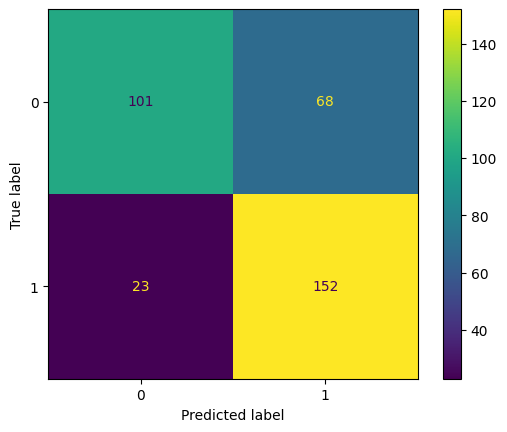

In [ ]:
print(classification_report(y_test,y_pred_nb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb))

**SVM**

In [ ]:
sv=SVC()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
y_pred_sv

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
print(accuracy_score(y_test,y_pred_sv)*100)

88.95348837209302


              precision    recall  f1-score   support

           0       0.87      0.92      0.89       169
           1       0.92      0.86      0.89       175

    accuracy                           0.89       344
   macro avg       0.89      0.89      0.89       344
weighted avg       0.89      0.89      0.89       344



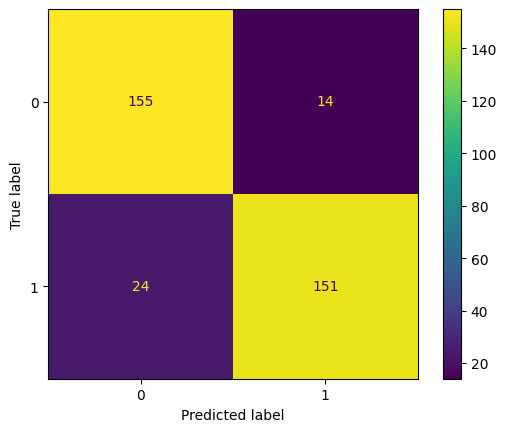

In [ ]:
print(classification_report(y_test,y_pred_sv))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))

In [ ]:
#svm hypertuning
params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}
clf=GridSearchCV(sv,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [ ]:
sv1=SVC(C=10, gamma=10, kernel='rbf')
sv1.fit(X_train,y_train)
y_pred2=sv1.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       169
           1       0.95      0.93      0.94       175

    accuracy                           0.94       344
   macro avg       0.94      0.94      0.94       344
weighted avg       0.94      0.94      0.94       344



**DECISION TREE**

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
y_pred_dt

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
print(accuracy_score(y_test,y_pred_dt)*100)

87.20930232558139


              precision    recall  f1-score   support

           0       0.88      0.86      0.87       169
           1       0.87      0.89      0.88       175

    accuracy                           0.87       344
   macro avg       0.87      0.87      0.87       344
weighted avg       0.87      0.87      0.87       344



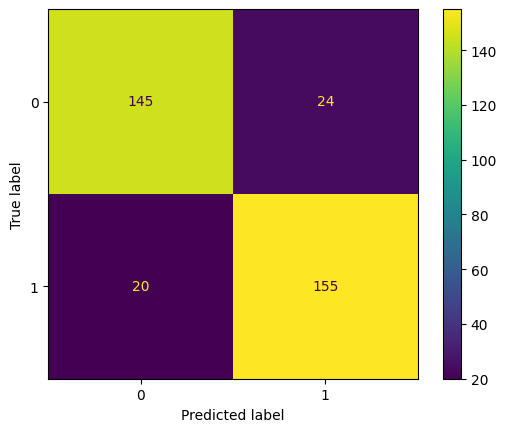

In [ ]:
print(classification_report(y_test,y_pred_dt))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt))

In [ ]:
#dt hypertuning
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(dt,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=2,min_samples_split=10)
dt1.fit(X_train,y_train)
y_predd=dt1.predict(X_test)
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       169
           1       0.91      0.78      0.84       175

    accuracy                           0.85       344
   macro avg       0.86      0.85      0.85       344
weighted avg       0.86      0.85      0.85       344



**RANDOM FOREST**

In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [ ]:
print(accuracy_score(y_test,y_pred_rf)*100)

92.73255813953489


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       169
           1       0.93      0.93      0.93       175

    accuracy                           0.93       344
   macro avg       0.93      0.93      0.93       344
weighted avg       0.93      0.93      0.93       344



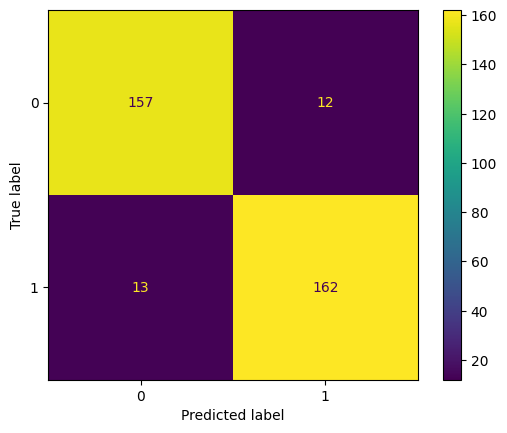

In [ ]:
print(classification_report(y_test,y_pred_rf))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))

In [ ]:
#rf hypertuning
parameters = {'n_estimators': [100, 200, 300],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(rf,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
rf1=RandomForestClassifier(n_estimators=300,min_samples_leaf=1,min_samples_split=2,max_depth=None)
rf1.fit(X_train,y_train)
y_predr=rf1.predict(X_test)
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       169
           1       0.95      0.92      0.94       175

    accuracy                           0.94       344
   macro avg       0.94      0.94      0.94       344
weighted avg       0.94      0.94      0.94       344



In [ ]:
#adaboost
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred1=ad.predict(X_test)
y_pred1

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [ ]:
print(accuracy_score(y_test,y_pred1)*100)
print(classification_report(y_test,y_pred1))

84.01162790697676
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       169
           1       0.83      0.87      0.85       175

    accuracy                           0.84       344
   macro avg       0.84      0.84      0.84       344
weighted avg       0.84      0.84      0.84       344



In [ ]:
#hypertuning
parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0]}
clf=GridSearchCV(ad,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'learning_rate': 0.5, 'n_estimators': 100}


In [ ]:
ad1=AdaBoostClassifier(learning_rate=0.5,n_estimators=100)
ad1.fit(X_train,y_train)
y_preda=ad1.predict(X_test)
print(classification_report(y_test,y_preda))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       169
           1       0.88      0.87      0.87       175

    accuracy                           0.87       344
   macro avg       0.87      0.87      0.87       344
weighted avg       0.87      0.87      0.87       344



In [ ]:
#gradient boost
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred2=gb.predict(X_test)
y_pred2

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       169
           1       0.92      0.91      0.92       175

    accuracy                           0.92       344
   macro avg       0.92      0.92      0.92       344
weighted avg       0.92      0.92      0.92       344



In [ ]:
#hypertuning
parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0],'max_depth': [3, 5, 7]}
clf=GridSearchCV(gb,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 100}


In [ ]:
gb1=GradientBoostingClassifier(learning_rate=0.5,max_depth=7,n_estimators=100)
gb1.fit(X_train,y_train)
y_predg=gb1.predict(X_test)
print(classification_report(y_test,y_predg))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       169
           1       0.95      0.92      0.94       175

    accuracy                           0.94       344
   macro avg       0.94      0.94      0.94       344
weighted avg       0.94      0.94      0.94       344



In [ ]:
#xgb
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred3=xgb.predict(X_test)
y_pred3

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       169
           1       0.95      0.93      0.94       175

    accuracy                           0.94       344
   macro avg       0.94      0.94      0.94       344
weighted avg       0.94      0.94      0.94       344



In [ ]:
parameters={'max_depth': [3, 4, 5],'learning_rate': [0.1, 0.01, 0.001],'n_estimators': [100, 200, 300],'subsample':[0.8, 0.9, 1.0]}
clf=GridSearchCV(xgb,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
xgb1=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=200,subsample=0.8)
xgb1.fit(X_train,y_train)
y_predg=xgb1.predict(X_test)
print(classification_report(y_test,y_predg))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       169
           1       0.94      0.94      0.94       175

    accuracy                           0.94       344
   macro avg       0.94      0.94      0.94       344
weighted avg       0.94      0.94      0.94       344



**Conclusion:** After comparing all the models we can conclude that svm,random forest,gradient boost and xgb boost gives the highest accuracy 0.94 and also we can see that Naive bayes model has the least accuracy.